
# Spectral whitening

This example show the effect of spectral whitening on a stream of traces.
The stream is read from the obspy example data, and the whitening is performed
with the method :func:`~covseisnet.stream.NetworkStream.whiten`. The method
applies a Fourier transform to the traces, divides the spectrum of the traces
by the modulus of the spectrum (or a smooth version of it), and then applies the
inverse Fourier transform to the traces.


In [1]:
import covseisnet as csn

## Read waveforms

This section reads an example stream of seismic data, which is shipped with
ObsPy. The stream contains three traces.



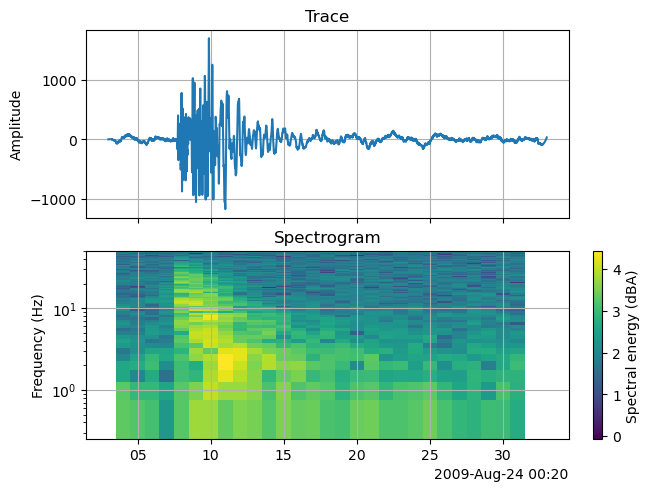

In [2]:
# Read the example stream (shipped with ObsPy)
stream = csn.read()

# Extract the first trace, and preprocess it
trace = stream[0]
trace.filter("highpass", freq=0.4)

# Plot trace and corresponding spectrum
ax = csn.plot.trace_and_spectrogram(stream.traces[0], window_duration=2)

## Spectral whitenin (onebit)

The spectral whitening is applied to the stream using the method
:func:`~covseisnet.stream.NetworkStream.whiten`. The method applies a
Fourier transform to the traces, divides the spectrum of the traces by the
modulus of the spectrum, and then applies the inverse Fourier transform to
the traces.



Text(0.5, 1.0, 'Whitened spectrogram')

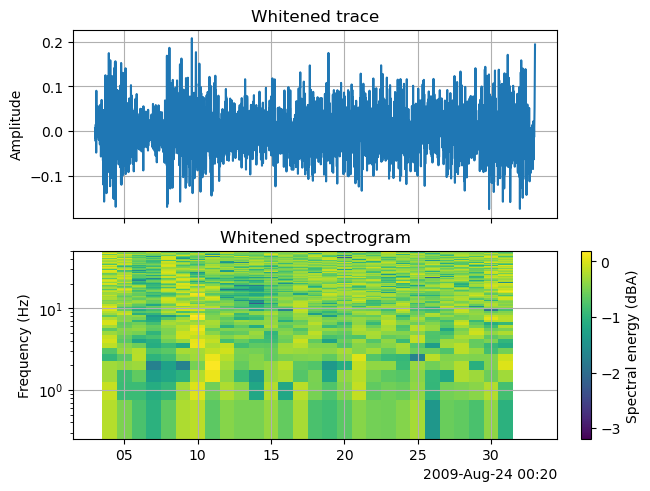

In [3]:
whitened_stream = stream.copy()
whitened_stream.whiten(window_duration=10, smooth_length=0)

# Plot whitened trace and corresponding spectrum
_, ax = csn.plot.trace_and_spectrogram(
    whitened_stream.traces[0], window_duration=2
)
ax[0].set_title("Whitened trace")
ax[1].set_title("Whitened spectrogram")

## Spectral whitening (smooth)

The spectral whitening is applied to the stream using the method
:func:`~covseisnet.stream.NetworkStream.whiten`. The method applies a Fourier
transform to the traces, divides the spectrum of the traces by a smooth
version of the modulus of the spectrum, and then applies the inverse Fourier
transform. The smoothing is performed with a Savitzky-Golay filter, with a
window length of 31 frequency bins.



Text(0.5, 1.0, 'Whitened spectrogram (smooth)')

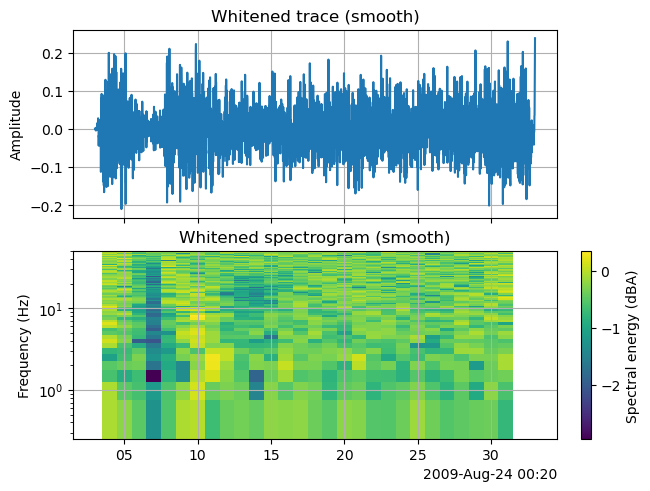

In [4]:
whitened_stream = stream.copy()
whitened_stream.whiten(window_duration=10, smooth_length=31)

# Plot whitened trace and corresponding spectrum
_, ax = csn.plot.trace_and_spectrogram(
    whitened_stream.traces[0], window_duration=2
)
ax[0].set_title("Whitened trace (smooth)")
ax[1].set_title("Whitened spectrogram (smooth)")